## Лабораторная работа 2.2.3

# Определение теплопроводности газов при атмосферном давлении

#### Цель работы

Определение коэффициента теплопроводности воздуха или углекислого газа при атмосферном давлении и разных температурах по теплоотдачи нагреваемой током нити в цилиндрическом сосуде.

#### В работе используются

* прибор для определения теплопроводности газов
* форвакуумный насос
* газгольдер с углекислым газом
* манометр
* магазин сопротивлений
* эталонное сопротивление 10 Ом
* цифровой вольтметр
* источник питания

### Экспериментальная установка

![image](images/laboratory-setup.png)

### Ход работы

1. Снять при комнатной температуре зависимость напряжения на нити $U_{н}$ от напряжения на эталонном сопротивлении $U_{э}$. После изменения тока в проволоке выдержать паузу для установления стационарного режима и записать показания прибора, когда они перестанут меняться.

2. Повторить измерения п. 1 при ещё нескольких температурах прибора в интервале 20-70 °C.

3. Для каждой температуры прибора построить график зависимости выделяемой мощности $Q = 0.1 U_н U_э$ от сопротивления нити $R_н = 10 U_н / U_э$. По графику определить наклон $dQ/dR$ и сопротивление нити $R_0$ при температуре термостата, то есть при нулевой выделяемой мощности.

4. Построить по значениям $R_0$ график зависимости сопротивления нити от температуры. Точки должны хорошо ложиться на прямую. Определить по графику наклон $dR/dT$. Рекомендуется также определить температурный коэффициент сопротивления материала нити $ {\alpha} = { {1} \over {R_{273}} } { {{dR} \over {dT}} } $.

5. Для каждой температуры прибора определить значение коэффициента теплопроводности газа по формулам $$ {\varkappa} = { {{dQ}\over{dT}} \dot { {1}\over{2 \pi L}} {\ln{ {r_2}\over{r_1} }} }, {{{dQ}\over{dT}} = {{dQ}\over{dR}} {{dR}\over{dT}} }$$ Построить график зависимости теплопроводности от температуры.

6. Предполагая, что зависимость коэффициента теплопроводности от температуры имеет вид $\varkappa = AT^{\beta}$, определить показатель степени $\beta$. Для этого построить график зависимости $\ln{\varkappa}$ от $\ln{T}$.

### Теория

$$ {\varkappa} = { { {Q} \over {T_1 - T_2} } { {1} \over {2 \pi L} } { \ln { {r_1} \over {r_2} } } } $$

Здесь $r_1$ и $T_1$ - радиус и температура нити, $r_2$ и $T_2$ - радиус и температура внешнего цилиндра, $Q$ - тепловой поток.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.optimize import curve_fit
import scipy
from scipy import odr
from scipy import optimize
%matplotlib inline

In [2]:
temperatures = pd.read_csv('data/temperatures.csv')['T']
data = [pd.read_csv('data/measurements_{}.csv'.format(t)) for t in temperatures]
for dataset in data:
    dataset['Q'] = 0.1 * dataset['U_n'] * dataset['U_e']
    dataset['R'] = 10 * dataset['U_n'] / dataset['U_e']

measurements = pd.read_csv('data/measurements.csv')
measurements = 10 * measurements['U_n'] / measurements['U_e']

In [3]:
for dataset in data:
    display(dataset)
display(measurements)

U_n  U_e    Q   R
0    1    1  0.1  10
1    2    2  0.4  10
2    3    3  0.9  10
3    4    4  1.6  10

U_n  U_e    Q   R
0    1    1  0.1  10
1    2    2  0.4  10
2    3    3  0.9  10
3    4    4  1.6  10

U_n  U_e    Q   R
0    1    1  0.1  10
1    2    2  0.4  10
2    3    3  0.9  10
3    4    4  1.6  10

0    10
dtype: float64

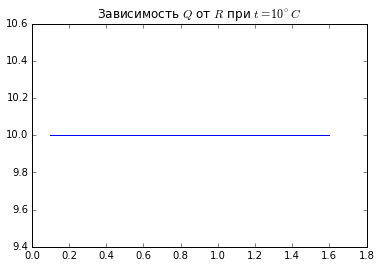

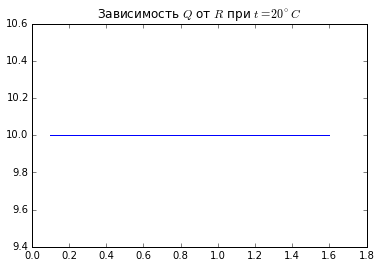

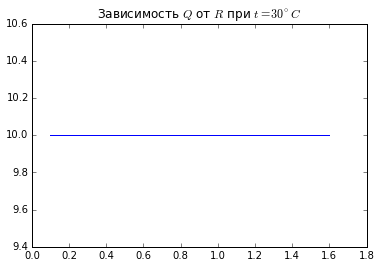

In [4]:
dRdT = []
R0 = []

for temperature, dataset in zip(temperatures, data):
    plt.figure()
    x, y, sx, sy = dataset['Q'], dataset['R'], dataset['Q'] * 0.01, dataset['R'] * 0.01
    odr_model = scipy.odr.Model(lambda B, x: B[0] * x + B[1])
    odr_data = scipy.odr.RealData(x=x, y=y, sx=sx, sy=sy)
    odr = scipy.odr.ODR(odr_data, odr_model, beta0=[0, 0], maxit=1000000)
    odr_output = odr.run()
    dRdT.append(odr_output.beta[0])
    R0.append(odr_output.beta[1])

    X = np.linspace(min(x), max(x))
    Y = odr_output.beta[0] * X + odr_output.beta[1]
    plt.plot(X, Y)
    plt.title('Зависимость $Q$ от $R$ при $t={}^\circ C$'.format(temperature))

plt.show()